<a href="https://colab.research.google.com/github/baliant/Thesis/blob/main/NagyBalint_DataPreprocess.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# General Description

![image.png](
  
)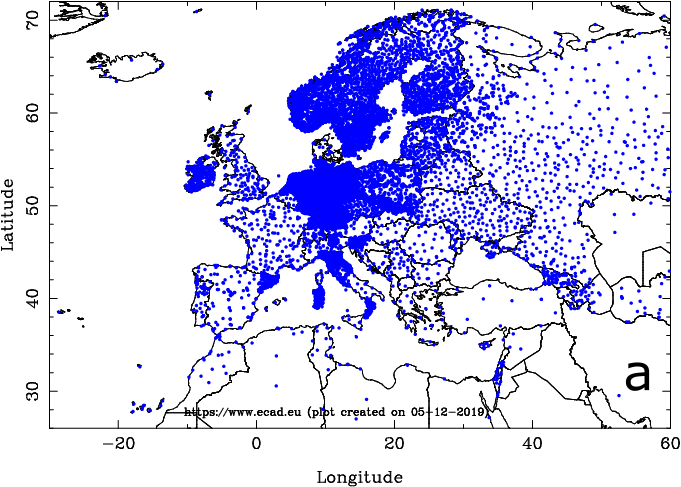

The user interaction has led to improvement in the E-OBS gridded dataset in the past. Three examples of improvement are given below. In E-OBSv4.0 (released March 2011), a user from the Regional Climate Modelling community noticed that the correlation between the E-OBS daily rainfall estimate and his simulations correlated well, except over Poland (Figure 5). This problem turned out to be related to the absence of relevant **metadata** of the underlying station data. Accumulated 24-hour rainfall amounts, usually measured in the morning, can be tagged with the start of the measuring interval or to the end of the measuring interval. There is no standardization in relating the date to this measurement practice across Europe. ECA&D staff lacked access to the metadata which indicate that rainfall estimates from Poland were related to the end of the measuring interval. A time shift of one day in the underlying station data for Poland alleviated this problem.

# cdsapi



## Install

In [ ]:
!pip install cdsapi
!pip install cartopy

  Preparing metadata (setup.py) ... done
  Created wheel for cdsapi: filename=cdsapi-0.6.1-py2.py3-none-any.whl size=12006 sha256=9122f82c57bd01d3434b29cabec993d36907ff29975b5d27df82f8df22561ce5
  Stored in directory: /root/.cache/pip/wheels/7c/63/08/45461d6f6636c1aba7846828d8c787a064073945048f76d44a
Successfully built cdsapi
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 34.4 MB/s eta 0:00:00


## Get Dataset

In [ ]:
# Coordinates of Budapest
latitude = 47.49801
longitude = 19.03991

# Due to API limitations I had to give broader area (with a too close area it handled as an exception and downloaded whole Europe)
north = 50.1
west = 15.1
south = 45.5
east = 22.2

In [ ]:
import cdsapi

In [ ]:
# 1995 - 2010
c = cdsapi.Client()
print([north, west, south, east])

c.retrieve(
    'insitu-gridded-observations-europe',
    {
        'product_type': 'ensemble_mean',
        'variable': 'mean_temperature',
        'grid_resolution': '0.1deg',
        'period': '1995_2010',
        'area': [north, west, south, east],
        'version': '28.0e',
        'format': 'zip',
    },
    'download_1995_2010.zip')

2024-04-14 21:44:23,537 INFO Welcome to the CDS
INFO:cdsapi:Welcome to the CDS
2024-04-14 21:44:23,541 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/insitu-gridded-observations-europe
INFO:cdsapi:Sending request to https://cds.climate.copernicus.eu/api/v2/resources/insitu-gridded-observations-europe


[50.1, 15.1, 45.5, 22.2]


2024-04-14 21:44:23,772 INFO Request is queued
INFO:cdsapi:Request is queued
2024-04-14 21:44:24,950 INFO Request is running
INFO:cdsapi:Request is running
2024-04-14 21:44:57,187 INFO Request is completed
INFO:cdsapi:Request is completed
2024-04-14 21:44:57,191 INFO Downloading https://download-0007-clone.copernicus-climate.eu/cache-compute-0007/cache/data0/dataset-insitu-gridded-observations-europe-011ba741-c41f-489c-8ae0-b65f76b76649.zip to download_1995_2010.zip (26.5M)
INFO:cdsapi:Downloading https://download-0007-clone.copernicus-climate.eu/cache-compute-0007/cache/data0/dataset-insitu-gridded-observations-europe-011ba741-c41f-489c-8ae0-b65f76b76649.zip to download_1995_2010.zip (26.5M)
2024-04-14 21:45:04,308 INFO Download rate 3.7M/s
INFO:cdsapi:Download rate 3.7M/s


Result(content_length=27780625,content_type=application/zip,location=https://download-0007-clone.copernicus-climate.eu/cache-compute-0007/cache/data0/dataset-insitu-gridded-observations-europe-011ba741-c41f-489c-8ae0-b65f76b76649.zip)

In [ ]:
# 2011 - 2023
c = cdsapi.Client()

c.retrieve(
    'insitu-gridded-observations-europe',
    {
        'product_type': 'ensemble_mean',
        'variable': 'mean_temperature',
        'grid_resolution': '0.1deg',
        'period': '2011_2023',
        'area': [north, west, south, east],
        'version': '28.0e',
        'format': 'zip',
    },
    'download_2011_2023.zip')

2024-04-14 21:46:13,128 INFO Welcome to the CDS
INFO:cdsapi:Welcome to the CDS
2024-04-14 21:46:13,132 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/insitu-gridded-observations-europe
INFO:cdsapi:Sending request to https://cds.climate.copernicus.eu/api/v2/resources/insitu-gridded-observations-europe
2024-04-14 21:46:13,360 INFO Request is queued
INFO:cdsapi:Request is queued
2024-04-14 21:46:14,536 INFO Request is running
INFO:cdsapi:Request is running
2024-04-14 21:50:33,725 INFO Request is completed
INFO:cdsapi:Request is completed
2024-04-14 21:50:33,729 INFO Downloading https://download-0006-clone.copernicus-climate.eu/cache-compute-0006/cache/data3/dataset-insitu-gridded-observations-europe-261db926-00ed-4319-95b8-2935d0efa1cf.zip to download_2011_2023.zip (20.7M)
INFO:cdsapi:Downloading https://download-0006-clone.copernicus-climate.eu/cache-compute-0006/cache/data3/dataset-insitu-gridded-observations-europe-261db926-00ed-4319-95b8-2935d0efa1cf.zip to

Result(content_length=21709869,content_type=application/zip,location=https://download-0006-clone.copernicus-climate.eu/cache-compute-0006/cache/data3/dataset-insitu-gridded-observations-europe-261db926-00ed-4319-95b8-2935d0efa1cf.zip)

In [ ]:
!pip install netCDF4 xarray

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 42.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 64.4 MB/s eta 0:00:00


In [ ]:
import zipfile
import os

In [ ]:
def extract(zip_path):
  extract_dir =  '/content'
  try:
    with zipfile.ZipFile(zip_path, 'r') as zip_ref:
      zip_ref.extractall(extract_dir)
    print(f"Contents of '{extract_dir}': {os.listdir(extract_dir)}")

  except FileNotFoundError:
    print(f"Error: The file '{zip_path}' does not exist.")
  except zipfile.BadZipFile:
    print(f"Error: The file '{zip_path}' is not a valid ZIP file.")
  except Exception as e:
    print(f"An error occurred: {str(e)}")

# ToDo: automatic renaming based on a convention

In [ ]:
extract('download_1995_2010.zip')
extract('download_2011_2023.zip')

Contents of '/content': ['.config', '011ba741-c41f-489c-8ae0-b65f76b76649-tg_ens_mean_0_area_subset.nc', 'download_1995_2010.zip', 'download_2011_2023.zip', 'sample_data']
Contents of '/content': ['.config', '011ba741-c41f-489c-8ae0-b65f76b76649-tg_ens_mean_0_area_subset.nc', 'download_1995_2010.zip', '261db926-00ed-4319-95b8-2935d0efa1cf-tg_ens_mean_0_area_subset.nc', 'download_2011_2023.zip', 'sample_data']


In [ ]:
import xarray as xr

In [ ]:
netcdf_file = '1995_2010.nc'
xrds_1995 = xr.open_dataset(netcdf_file)
print(xrds_1995)

<xarray.Dataset>
Dimensions:    (latitude: 46, longitude: 71, time: 5844)
Coordinates:
  * latitude   (latitude) float64 45.55 45.65 45.75 45.85 ... 49.85 49.95 50.05
  * longitude  (longitude) float64 15.15 15.25 15.35 15.45 ... 21.95 22.05 22.15
  * time       (time) datetime64[ns] 1995-01-01 1995-01-02 ... 2010-12-31
Data variables:
    tg         (time, latitude, longitude) float32 ...
Attributes:
    NCO:            netCDF Operators version 4.7.5 (Homepage = http://nco.sf....
    E-OBS_version:  28.0e
    Conventions:    CF-1.4
    References:     http://surfobs.climate.copernicus.eu/dataaccess/access_eo...
    history:        Fri Sep 22 09:11:41 2023: ncks --no-abc -d time,16436,222...


In [ ]:
print(xrds_1995['time'].values)

['1995-01-01T00:00:00.000000000' '1995-01-02T00:00:00.000000000'
 '1995-01-03T00:00:00.000000000' ... '2010-12-29T00:00:00.000000000'
 '2010-12-30T00:00:00.000000000' '2010-12-31T00:00:00.000000000']


In [ ]:
netcdf_file = '2011_2023.nc'
xrds_2011 = xr.open_dataset(netcdf_file)
print(xrds_2011)

<xarray.Dataset>
Dimensions:    (latitude: 46, longitude: 71, time: 4564)
Coordinates:
  * latitude   (latitude) float64 45.55 45.65 45.75 45.85 ... 49.85 49.95 50.05
  * longitude  (longitude) float64 15.15 15.25 15.35 15.45 ... 21.95 22.05 22.15
  * time       (time) datetime64[ns] 2011-01-01 2011-01-02 ... 2023-06-30
Data variables:
    tg         (time, latitude, longitude) float32 ...
Attributes:
    NCO:            netCDF Operators version 4.7.5 (Homepage = http://nco.sf....
    E-OBS_version:  28.0e
    Conventions:    CF-1.4
    References:     http://surfobs.climate.copernicus.eu/dataaccess/access_eo...
    history:        Fri Sep 22 09:12:42 2023: ncks --no-abc -d time,22280,268...


In [ ]:
for attribute, value in xrds_1995.attrs.items():
  print(attribute, value, '\n')

NCO netCDF Operators version 4.7.5 (Homepage = http://nco.sf.net, Code = http://github.com/nco/nco) 

E-OBS_version 28.0e 

Conventions CF-1.4 

References http://surfobs.climate.copernicus.eu/dataaccess/access_eobs.php 

history Fri Sep 22 09:11:41 2023: ncks --no-abc -d time,16436,22279 /data4/Else/EOBSv28.0e/Grid_0.1deg/tg//tg_ensmean_master_rectime.nc /data4/Else/EOBSv28.0e/Grid_0.1deg/tg//tg_ens_mean_0.1deg_reg_1995-2010_v28.0e.nc
Fri Sep 22 09:03:49 2023: ncks --no-abc --mk_rec_dmn time /data4/Else/EOBSv28.0e/Grid_0.1deg/tg//tg_ensmean_master.nc /data4/Else/EOBSv28.0e/Grid_0.1deg/tg//tg_ensmean_master_rectime.nc 



In [ ]:
print(xrds_1995.data_vars['tg'])
print(xrds_2011.data_vars['tg'])

<xarray.DataArray 'tg' (time: 5844, latitude: 46, longitude: 71)>
[19086504 values with dtype=float32]
Coordinates:
  * latitude   (latitude) float64 45.55 45.65 45.75 45.85 ... 49.85 49.95 50.05
  * longitude  (longitude) float64 15.15 15.25 15.35 15.45 ... 21.95 22.05 22.15
  * time       (time) datetime64[ns] 1995-01-01 1995-01-02 ... 2010-12-31
Attributes:
    units:          Celsius
    long_name:      mean temperature
    standard_name:  air_temperature
    cell_methods:   time: mean
<xarray.DataArray 'tg' (time: 4564, latitude: 46, longitude: 71)>
[14906024 values with dtype=float32]
Coordinates:
  * latitude   (latitude) float64 45.55 45.65 45.75 45.85 ... 49.85 49.95 50.05
  * longitude  (longitude) float64 15.15 15.25 15.35 15.45 ... 21.95 22.05 22.15
  * time       (time) datetime64[ns] 2011-01-01 2011-01-02 ... 2023-06-30
Attributes:
    units:          Celsius
    long_name:      mean temperature
    standard_name:  air_temperature
    cell_methods:   time: mean


In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import datetime as dt

%matplotlib inline

In [ ]:
desired_date = '2009-06-29'
data_for_desired_date = xrds_1995.sel(time=desired_date)

In [ ]:
print(data_for_desired_date)

<xarray.Dataset>
Dimensions:    (latitude: 46, longitude: 71)
Coordinates:
  * latitude   (latitude) float64 45.55 45.65 45.75 45.85 ... 49.85 49.95 50.05
  * longitude  (longitude) float64 15.15 15.25 15.35 15.45 ... 21.95 22.05 22.15
    time       datetime64[ns] 2009-06-29
Data variables:
    tg         (latitude, longitude) float32 ...
Attributes:
    NCO:            netCDF Operators version 4.7.5 (Homepage = http://nco.sf....
    E-OBS_version:  28.0e
    Conventions:    CF-1.4
    References:     http://surfobs.climate.copernicus.eu/dataaccess/access_eo...
    history:        Fri Sep 22 09:11:41 2023: ncks --no-abc -d time,16436,222...


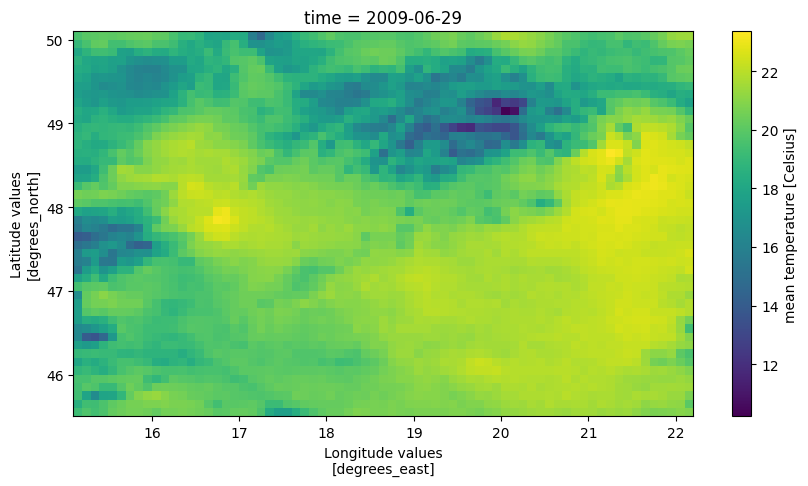

In [ ]:
plt.figure(figsize=(10,5))

data_for_desired_date['tg'].plot()
plt.show()

In [ ]:
import cartopy.crs as ccrs

ModuleNotFoundError: No module named 'cartopy'

/usr/local/lib/python3.10/dist-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/10m_physical/ne_10m_coastline.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)


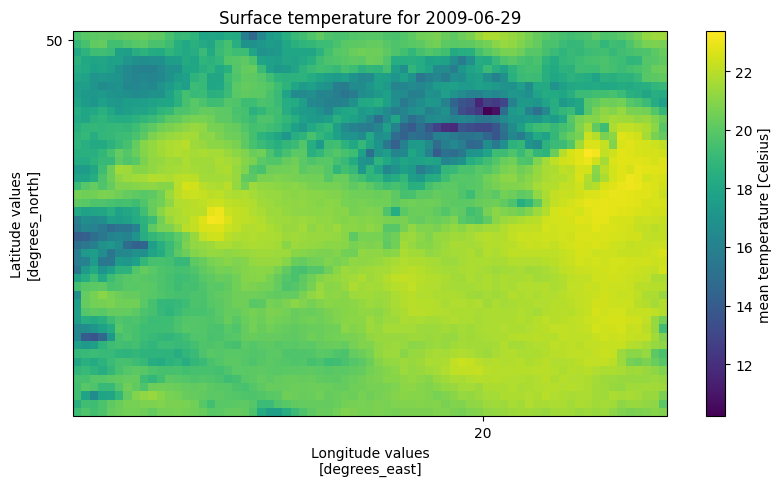

In [ ]:
plt.figure(figsize=(10,5))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines()

ax.set_xticks(range(-30,50,10), crs=ccrs.PlateCarree())
ax.set_yticks(range(20,80,10), crs=ccrs.PlateCarree())
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')


data_for_desired_date['tg'].plot()

plt.title(f'Surface temperature for {desired_date}')
plt.show()

# Dataframe

## Create DataFrame

For a single time series, there is no added value to use nc files, so first I convert them to a more usual dataframes.

In [ ]:
ds = xr.open_dataset('1995_2010.nc')

time_target = dt.datetime(2009, 6, 29)
lat_target = 47.497913
lon_target = 19.040236

timeslice = ds.sel(time=time_target, method='nearest')
lat_lon_slice = ds.sel(latitude=latitude, longitude=longitude, method='nearest')

df_1995 = lat_lon_slice.to_dataframe()
print(df_1995)

             latitude  longitude    tg
time                                  
1995-01-01  47.449861   19.04986  2.83
1995-01-02  47.449861   19.04986  2.31
1995-01-03  47.449861   19.04986  0.84
1995-01-04  47.449861   19.04986 -0.69
1995-01-05  47.449861   19.04986  0.18
...               ...        ...   ...
2010-12-27  47.449861   19.04986 -4.93
2010-12-28  47.449861   19.04986 -5.05
2010-12-29  47.449861   19.04986 -6.71
2010-12-30  47.449861   19.04986 -7.60
2010-12-31  47.449861   19.04986 -5.87

[5844 rows x 3 columns]


In [ ]:
ds = xr.open_dataset('2011_2023.nc')

time_target = dt.datetime(2022, 6, 29)

timeslice = ds.sel(time=time_target, method='nearest')
lat_lon_slice = ds.sel(latitude=latitude, longitude=longitude, method='nearest')

df_2011 = lat_lon_slice.to_dataframe()
print(df_2011)

             latitude  longitude         tg
time                                       
2011-01-01  47.449861   19.04986  -1.840000
2011-01-02  47.449861   19.04986   0.480000
2011-01-03  47.449861   19.04986  -2.380000
2011-01-04  47.449861   19.04986  -3.800000
2011-01-05  47.449861   19.04986  -3.580000
...               ...        ...        ...
2023-06-26  47.449861   19.04986  22.309999
2023-06-27  47.449861   19.04986  21.180000
2023-06-28  47.449861   19.04986  18.609999
2023-06-29  47.449861   19.04986  19.650000
2023-06-30  47.449861   19.04986  21.539999

[4564 rows x 3 columns]


In [ ]:
# ignore index False, I want to keep the time index
df = pd.concat([df_1995, df_2011], ignore_index=False)

In [ ]:
print(df)

             latitude  longitude         tg
time                                       
1995-01-01  47.449861   19.04986   2.830000
1995-01-02  47.449861   19.04986   2.310000
1995-01-03  47.449861   19.04986   0.840000
1995-01-04  47.449861   19.04986  -0.690000
1995-01-05  47.449861   19.04986   0.180000
...               ...        ...        ...
2023-06-26  47.449861   19.04986  22.309999
2023-06-27  47.449861   19.04986  21.180000
2023-06-28  47.449861   19.04986  18.609999
2023-06-29  47.449861   19.04986  19.650000
2023-06-30  47.449861   19.04986  21.539999

[10408 rows x 3 columns]


## Dataframe description

In [ ]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 10408 entries, 1995-01-01 to 2023-06-30
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   latitude   10408 non-null  float64
 1   longitude  10408 non-null  float64
 2   tg         10408 non-null  float32
dtypes: float32(1), float64(2)
memory usage: 284.6 KB
None


In [ ]:
df.describe()

,latitude,longitude,tg
count,1.040800e+04,10408.00000,10408.000000
mean,4.744986e+01,19.04986,12.446031
std,1.421154e-14,0.00000,8.697220
min,4.744986e+01,19.04986,-11.300000
25%,4.744986e+01,19.04986,5.347500
50%,4.744986e+01,19.04986,12.840000
75%,4.744986e+01,19.04986,19.622499
max,4.744986e+01,19.04986,33.029999


In [ ]:
import seaborn as sns

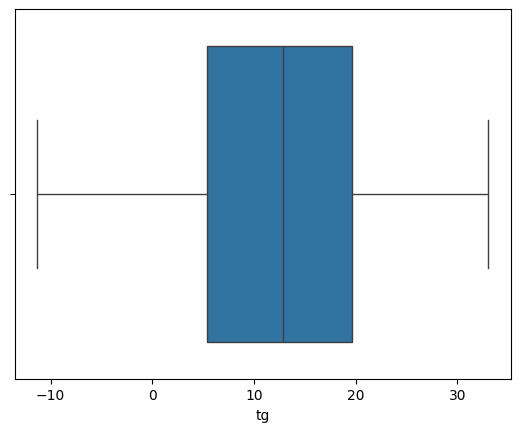

In [ ]:
sns.boxplot(x=df['tg'])
plt.show()

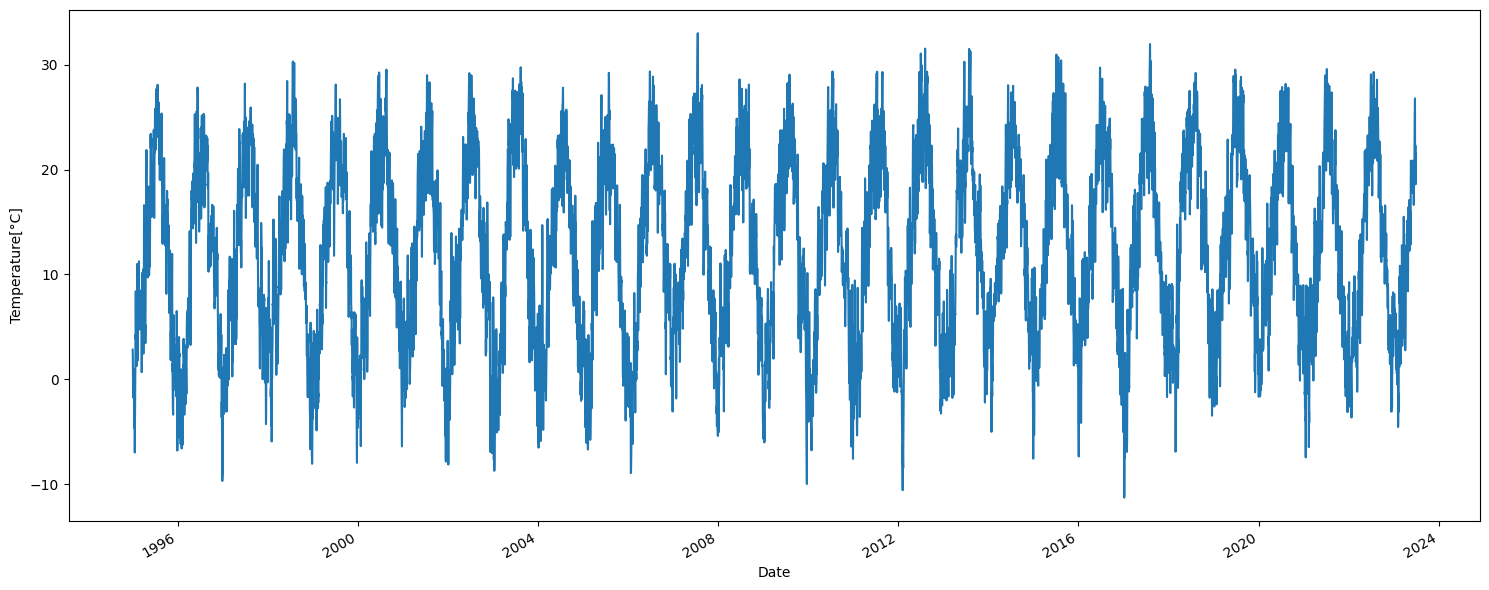

In [ ]:
fig, ax = plt.subplots(figsize=(15, 6))

ax.plot(df['tg'])
ax.set_xlabel('Date')
ax.set_ylabel('Temperature[°C]')


fig.autofmt_xdate()
plt.tight_layout()

## Periodogram

In [ ]:
def plot_periodogram(df, columns_to_plot, normalization_type='log'):
    # Ensure df.index is a DatetimeIndex
    if not isinstance(df.index, pd.DatetimeIndex):
        raise ValueError("DataFrame index must be a pd.DatetimeIndex.")

    periods = [1, 7, 30, 120, 365]
    labels = ['Daily', 'Weekly', 'Monthly', 'Seasonly', 'Yearly']

    fig, ax = plt.subplots(figsize=(20, 6))
    for col, color, label in columns_to_plot:
        fft_values = np.fft.rfft(df[col])[1:]
        periodogram = np.abs(fft_values)**2 / len(df)


        if normalization_type == 'max':
            periodogram = periodogram / np.max(periodogram)
        elif normalization_type == 'log':
            periodogram = np.log10(periodogram + 1)
        elif normalization_type == 'z-score':
            periodogram = (periodogram - np.mean(periodogram)) / np.std(periodogram)
        elif normalization_type == 'percentile':
            percentile = np.percentile(periodogram, 95)
            periodogram = np.minimum(periodogram, percentile)



        freqs = np.fft.rfftfreq(len(df), d=1)[1:]
        daily_freq = 1 / 1
        daily_freq_index = np.argmin(np.abs(freqs - daily_freq))
        print("Daily frequency index:", daily_freq_index, "Frequency:", freqs[daily_freq_index])





        periods_freqs = 1 / freqs
        ax.plot(periods_freqs, periodogram, color=color, label=label)

    # Adjusting plot scales and labels
    ax.set_xscale("log")
    ax.set_xticks(periods)
    ax.set_xticklabels(labels, rotation=45)



    ax.set_title("Periodogram Analysis")
    ax.set_xlabel("Period (Days)")
    ax.set_ylabel("Spectral Power")
    ax.legend()
    plt.grid(True)
    plt.show()

Daily frequency index: 5203 Frequency: 0.5


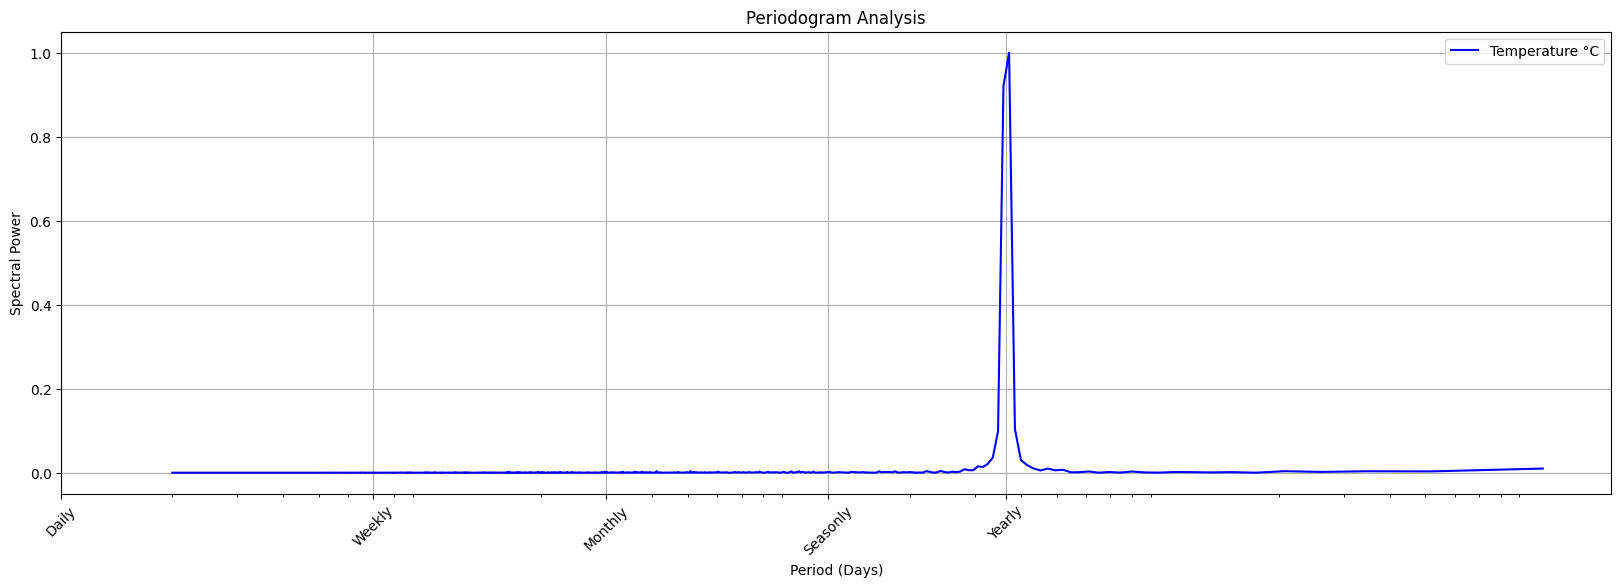

In [ ]:
columns_to_plot = [('tg', 'blue', 'Temperature °C')]
plot_periodogram(df, columns_to_plot, normalization_type='max')

In [ ]:
#

In [ ]:
from statsmodels.tsa.seasonal import STL

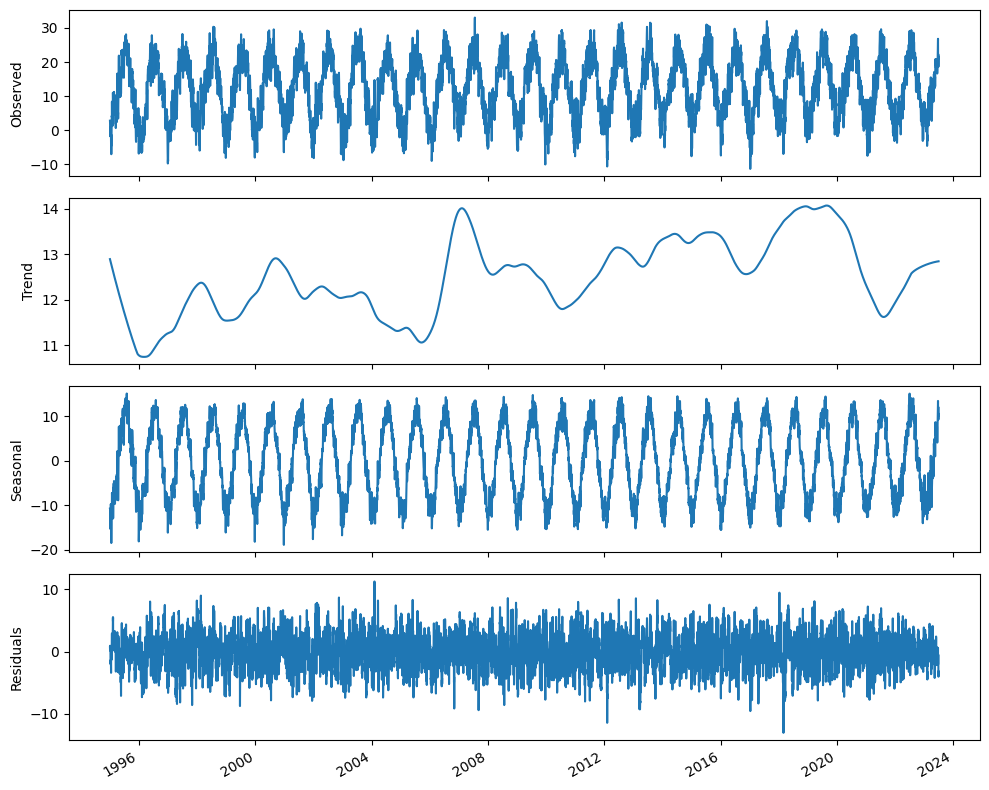

In [ ]:
decomposition = STL(df['tg'], period=365).fit()

fig, (ax1, ax2, ax3, ax4) = plt.subplots(nrows=4, ncols=1, sharex=True, figsize=(10,8))

ax1.plot(decomposition.observed)
ax1.set_ylabel('Observed')

ax2.plot(decomposition.trend)
ax2.set_ylabel('Trend')

ax3.plot(decomposition.seasonal)
ax3.set_ylabel('Seasonal')

ax4.plot(decomposition.resid)
ax4.set_ylabel('Residuals')


fig.autofmt_xdate()
plt.tight_layout()

# TimesNet

In [ ]:
!git clone https://github.com/thuml/Time-Series-Library
%cd '/content/Time-Series-Library'

Cloning into 'Time-Series-Library'...
remote: Enumerating objects: 1431, done.
remote: Counting objects: 100% (56/56), done.
remote: Compressing objects: 100% (36/36), done.
remote: Total 1431 (delta 29), reused 33 (delta 20), pack-reused 1375
Receiving objects: 100% (1431/1431), 78.08 MiB | 25.56 MiB/s, done.
Resolving deltas: 100% (997/997), done.
/content/Time-Series-Library


In [ ]:
pip install -r requirements.txt

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 25.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 15.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 19.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.5/77.5 kB 2.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.4/34.4 MB 10.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.0/16.0 MB 14.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.5/6.5 MB 29.0 MB/s eta 0:00:00
ERROR: Ignored the following versions that require a different python version: 0.10.0 Requires-Python >=3.7,<3.10; 0.10.1 Requires-Python >=3.7,<3.10; 0.11.0 Requires-Python >=3.7,<3.10; 0.11.1 Requires-Python >=3.7,<3.10; 0.11.2 Requires-Python >=3.7,<3.10; 0.11.3 Requires-Python >=3.7,<3.10; 0.11.4 Requires-Python >=3.7,<3.10; 0.12.0 Requires-Python >=3.7,<3.10; 0.12.1 Requires-Python >=3.7,<3.10; 1.6.2 Requires-Python >=3.7,<3.10

In [ ]:
!python --version

Python 3.10.12


In [ ]:
import random
import numpy as np
import os
import torch

def seed_everything(seed):
    random.seed(seed)                           # Python's buil-in random module
    os.environ['PYTHONHASHSEED'] = str(seed)    # Hash randomization control
    np.random.seed(seed)                        # Numpy seed
    torch.manual_seed(seed)                     # PyTorch CPU
    torch.cuda.manual_seed(seed)                # PyTorch GPU
    torch.cuda.manual_seed_all(seed)            # in case of multi-GPU.
    torch.backends.cudnn.deterministic = True   # https://discuss.pytorch.org/t/effect-of-torch-backends-cudnn-deterministic-true/113095
    torch.backends.cudnn.benchmark = False      # https://discuss.pytorch.org/t/what-does-torch-backends-cudnn-benchmark-do/5936

seed_number = 42
seed_everything(seed_number)

In [ ]:
from layers.Embed import DataEmbedding
from layers.Conv_Blocks import Inception_Block_V1

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.fft
from layers.Embed import DataEmbedding
from layers.Conv_Blocks import Inception_Block_V1     # The convolution block used for convoluting the 2D time data, changeable. For first try, I let it as is.

In [ ]:
def __init__(self, configs):                # configs is the configuration defined for TimesBlock
    super(TimesBlock, self).__init__()
    self.seq_len = configs.seq_len          # sequence length
    self.pred_len = configs.pred_len        # prediction length
    self.k = configs.top_k                  # k denotes how many top frequencies are taken into consideration

    # parameter-efficient design
    self.conv = nn.Sequential(
        Inception_Block_V1(configs.d_model, configs.d_ff,
                           num_kernels=configs.num_kernels),
        nn.GELU(),
        Inception_Block_V1(configs.d_ff, configs.d_model,
                           num_kernels=configs.num_kernels)
    )

In [ ]:
class Config:
    def __init__(self):
        self.seq_len = 30
        self.pred_len = 1
        self.top_k = 1
        self.d_model = 128
        self.d_ff = 256
        self.num_kernels = 3

config = Config()

# Initialize the TimesBlock with the config
# model = TimesBlock(config)

In [ ]:
def forward(self, x):
        B, T, N = x.size()
            #B: batch size  T: length of time series  N:number of features
        period_list, period_weight = FFT_for_Period(x, self.k)
            #FFT_for_Period() will be shown later. Here, period_list([top_k]) denotes
            #the top_k-significant period and period_weight([B, top_k]) denotes its weight(amplitude)

        res = []
        for i in range(self.k):
            period = period_list[i]

            # padding : to form a 2D map, we need total length of the sequence, plus the part
            # to be predicted, to be divisible by the period, so padding is needed
            if (self.seq_len + self.pred_len) % period != 0:
                length = (
                                 ((self.seq_len + self.pred_len) // period) + 1) * period
                padding = torch.zeros([x.shape[0], (length - (self.seq_len + self.pred_len)), x.shape[2]]).to(x.device)
                out = torch.cat([x, padding], dim=1)
            else:
                length = (self.seq_len + self.pred_len)
                out = x

            # reshape: we need each channel of a single piece of data to be a 2D variable,
            # Also, in order to implement the 2D conv later on, we need to adjust the 2 dimensions
            # to be convolutioned to the last 2 dimensions, by calling the permute() func.
            # Whereafter, to make the tensor contiguous in memory, call contiguous()
            out = out.reshape(B, length // period, period,
                              N).permute(0, 3, 1, 2).contiguous()

            #2D convolution to grap the intra- and inter- period information
            out = self.conv(out)

            # reshape back, similar to reshape
            out = out.permute(0, 2, 3, 1).reshape(B, -1, N)

            #truncating down the padded part of the output and put it to result
            res.append(out[:, :(self.seq_len + self.pred_len), :])
        res = torch.stack(res, dim=-1) #res: 4D [B, length , N, top_k]

        # adaptive aggregation
        #First, use softmax to get the normalized weight from amplitudes --> 2D [B,top_k]
        period_weight = F.softmax(period_weight, dim=1)

        #after two unsqueeze(1),shape -> [B,1,1,top_k],so repeat the weight to fit the shape of res
        period_weight = period_weight.unsqueeze(
            1).unsqueeze(1).repeat(1, T, N, 1)

        #add by weight the top_k periods' result, getting the result of this TimesBlock
        res = torch.sum(res * period_weight, -1)

        # residual connection
        res = res + x
        return res

In [ ]:
import argparse
import random
import numpy as np
import torch

def get_args():
    class Args:
        task_name = 'long_term_forecast'
        is_training = 1
        model_id = 'TimesNet_LTF'
        model = 'TimesNet'
        data = 'ETTm1'
        root_path = './data/ETT/'
        data_path = 'ETTh1.csv'
        features = 'MS'
        target = 'OT'
        freq = 'h'
        checkpoints = './checkpoints/'
        seq_len = 96
        label_len = 48
        pred_len = 96
        d_model = 512
        n_heads = 8
        e_layers = 2
        d_layers = 1
        d_ff = 2048
        train_epochs = 10
        batch_size = 32
        learning_rate = 0.0001
        patience = 3
        des = 'test'
        loss = 'MSE'
        lradj = 'type1'
        use_amp = False
        gpu = 0
        use_gpu = True
        use_multi_gpu = False
        devices = '0,1,2,3'
        expand = 2
        d_conv = 4
        factor = 1
        embed = 'timeF'
        distil = True
        output_attention = True
        itr = 1
        num_workers = 10
        augmentation_ratio = 0
        jitter = False
        scaling = False
        permutation = False
        randompermutation = False
        magwarp = False
        timewarp = False
        windowslice = False
        windowwarp = False
        rotation = False
        spawner = False
        dtwwarp = False
        shapedtwwarp = False
        wdba = False
        discdtw = False
        discsdtw = False
        extra_tag = ""
        p_hidden_dims = [128, 128]
        p_hidden_layers = 2
        use_dtw = False
        channel_independence = 1
        down_sampling_layers = 0
        down_sampling_window = 1
        down_sampling_method = None
        seg_len = 48

    args = Args()
    args.use_gpu = torch.cuda.is_available()
    if args.use_gpu and args.use_multi_gpu:
        args.devices = args.devices.replace(' ', '')
        device_ids = args.devices.split(',')
        args.device_ids = [int(id_) for id_ in device_ids]
        args.gpu = args.device_ids[0]
    return args


In [ ]:
class TimesBlock(nn.Module):
    def __init__(self, configs):              ##configs is the configuration defined for TimesBlock
      super(TimesBlock, self).__init__()
      self.seq_len = configs.seq_len   ##sequence length
      self.pred_len = configs.pred_len ##prediction length
      self.k = configs.top_k    ##k denotes how many top frequencies are
                                                            #taken into consideration
      # parameter-efficient design
      self.conv = nn.Sequential(
        Inception_Block_V1(configs.d_model, configs.d_ff,
                           num_kernels=configs.num_kernels),
        nn.GELU(),
        Inception_Block_V1(configs.d_ff, configs.d_model,
                           num_kernels=configs.num_kernels)
    )

    def forward(self, x):
        # Define how your data flows through the model
        return self.conv(x)


In [ ]:
model = TimesBlock(configs)

In [ ]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(df.dropna().iloc[:, 2])
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))


ADF Statistic: -6.231074
p-value: 0.000000
Critical Values:
	1%: -3.431
	5%: -2.862
	10%: -2.567


Links:


1.   NetCDF Conventions: https://cfconventions.org/cf-conventions/cf-conventions.html



# TimesNet

- April 2023
- https://arxiv.org/abs/2210.02186
- CNN-based model for
    - forecasting
    - data imputaion
    - anomaly detection
    - classification

Motivation
- multi-periodicity

Basically: reshapes the series in a 2D space to model:
- intrapeiod - variation: e.g. temperature in a day
- interperiod - variation: e.g. temperature day to day, or from year to year



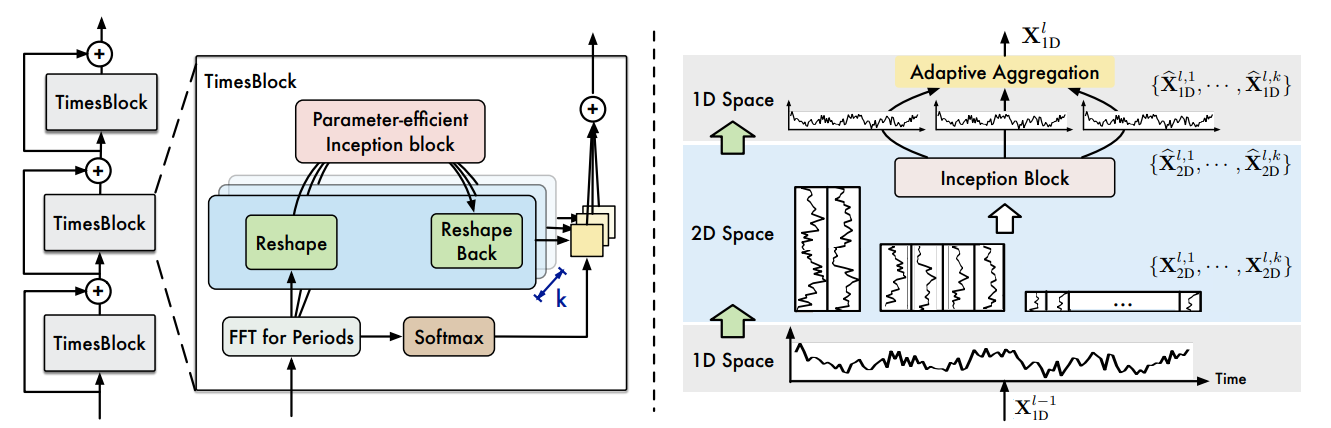

Residual connections of TimesBlocks.
Each residual block:
- Fast Fourier Transformation
- reshapes

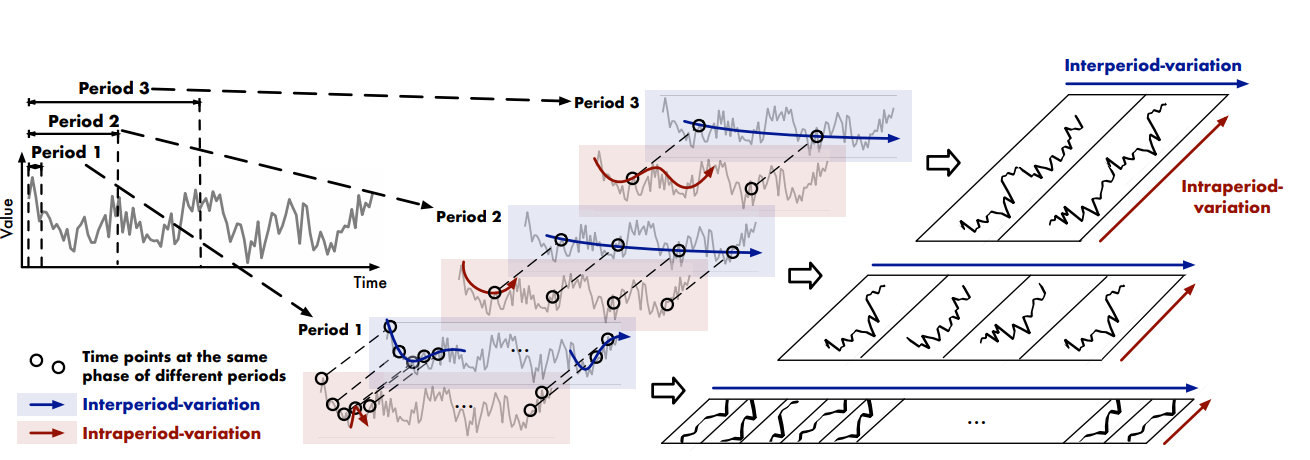

- Vertical axis: interperiod
- horizontal axis: intraperiod
Variations between adjacent points and adjacent periods

First we have to find periods --> FFT
For each period, creates a 2d tensor, goes to the inception block.
Inception block (GoogLeNet)


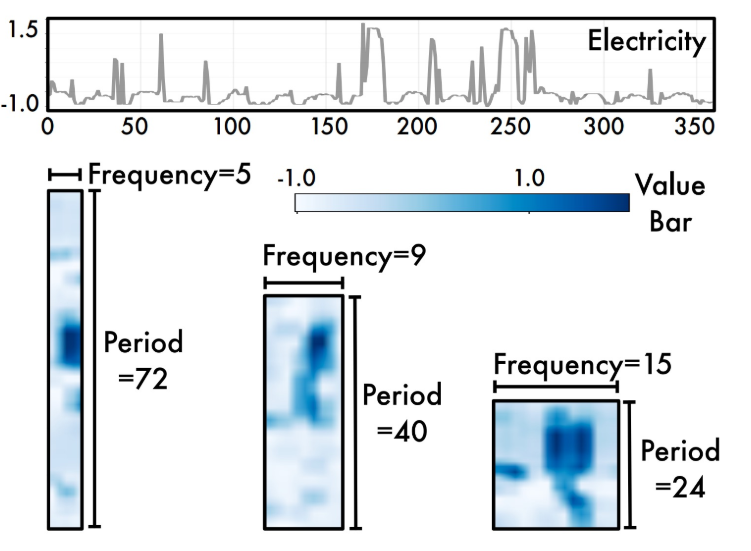

For each frequency (comes from FFT), reshapes the time series into a 2D tensor.
Inception block (imppementation?) Inception block is shared in all selected periods. It can be replaced by other block (ConvNext, ResNet, etc.)

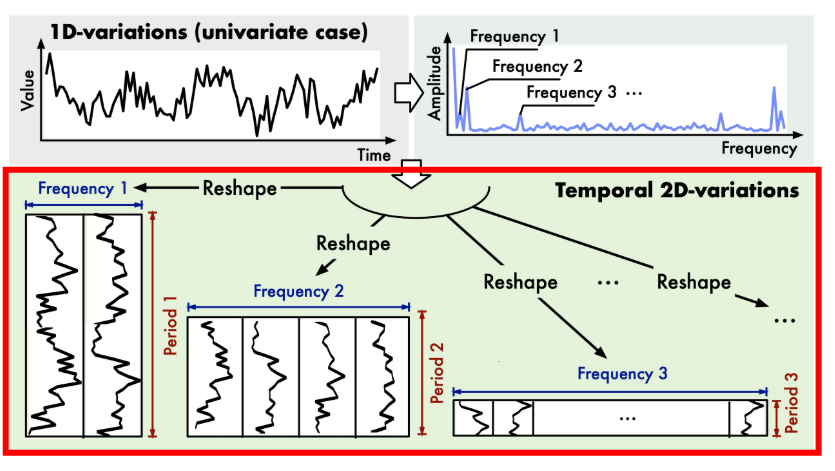